By : 𝔄𝔥𝔪𝔢𝔡 𝔄𝔰𝔥𝔯𝔞𝔣


dataset:https://www.kaggle.com/datasets/basilb2s/language-detection?datasetId=1150837&sortBy=dateRun&tab=profile

we'll build Model to use it 
language identifier for seventeen language

dataset consisting of 2 columns and 10337 rows (10337, 2)

# Importing Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline

In [2]:
data=pd.read_csv('Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data.shape

(10337, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
data.describe(include='O').transpose()

,count,unique,top,freq
Text,10337,10267,Jag är ledsen.,3
Language,10337,17,English,1385


In [6]:
data.isna().sum()

Text        0
Language    0
dtype: int64

In [7]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Check for different target labels:

Text(0, 0.5, 'Count')

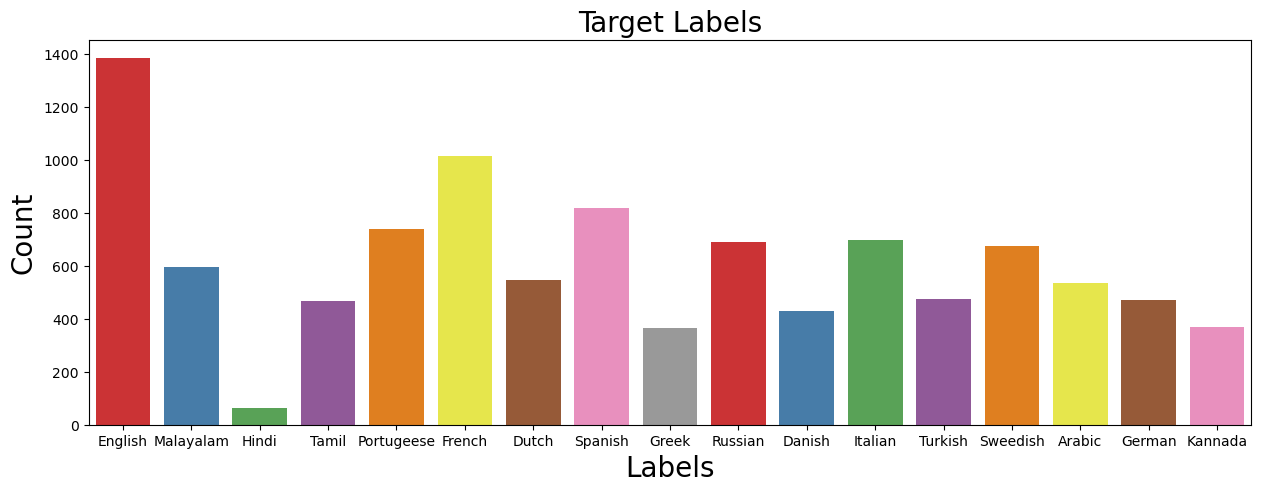

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=data,palette='Set1')
plt.title('Target Labels',fontsize=20)
plt.xlabel('Labels',fontsize=20)
plt.ylabel('Count',fontsize=20)

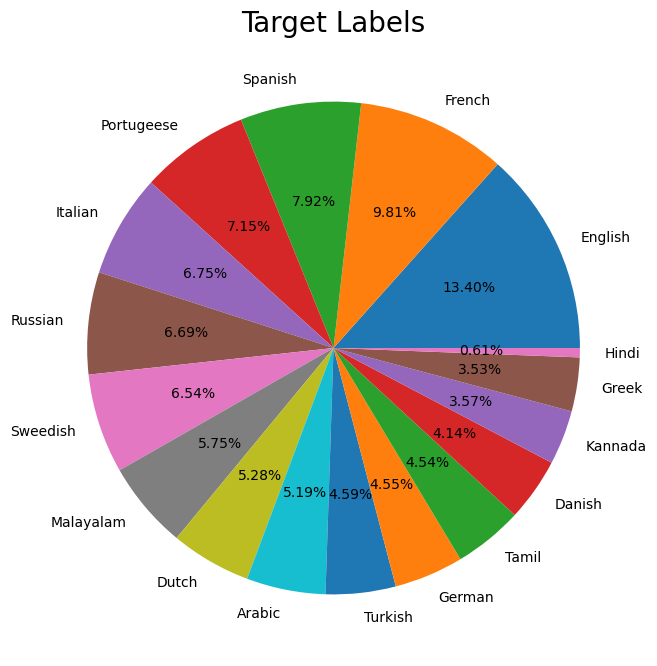

In [9]:
plt.figure(figsize=(8,8))
plt.pie(x = data['Language'].value_counts() ,autopct='%1.2f%%' ,labels=data['Language'].value_counts().index)
plt.title('Target Labels',fontsize=20)
plt.show()

# Show Input X and Output y

In [10]:
X=data.iloc[:,0]
y=data.iloc[:,-1]

In [11]:
X

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [12]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [13]:
y[y=='Portugeese']='Portuguese'

In [14]:
y[y=='Portugeese']

Series([], Name: Language, dtype: object)

# Text Cleaning & Visualization

In [15]:
def word_token(sentence):
    token=word_tokenize(sentence)
    return token
def remove_stop_word(sentence):
    '''stop_words=[]
    if label.lower() in stopwords.fileids():
        stop_words = stopwords.words(label.lower())'''
    punct = list(punctuation)
    token=word_token(sentence)
    words=[]
    for word in token:
        if  word not in punct and not word.isdigit() :
            words.append(word.lower())
    return words  
def pos(sentence):
    nlp = spacy.load('en_core_web_sm')
    for w , m in nltk.pos_tag(word_token(sentence)):
           print(f'word : ({w}), type : ({m}) , means : {spacy.explain(m)}')
def Stemming(sentence,label): 
    if label.lower() in SnowballStemmer.languages:
        snowball = SnowballStemmer(language=label.lower())
        for word in word_token(sentence):
            print(word,"--->",snowball.stem(word))
    else:
        print(f'Stemmer {label} غير متاح للغة')
def Lemmatizer(sentence):
    lemmatizer = WordNetLemmatizer()
    for word in word_token(sentence):
        print(word,"--->",lemmatizer.lemmatize(word))   
def NER_word(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    if doc.ents:
        for token in doc.ents:
            print(token.text , ' : ' ,  token.label_ , ' : ' , spacy.explain(token.label_))
    else:
        print('No named entities found.') 
def Visualization(sentence): 
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)

In [16]:
for i in np.random.randint(0,10337,10):
    print(word_token(X[i]))
    print('*'*40)

['man', 'ist', 'überflutet', 'überflutet', 'bedeutet', 'ertrinken', 'oder', 'überfluten', ',', 'aber', 'überflutet', 'wird', 'oft', 'im', 'Zusammenhang', 'mit', 'Arbeiten', 'wie', 'i', "'verwendet", '.']
****************************************
['de', 'rubis', 'as', 'saladas', 'de', 'esmeraldas', 'e', 'o', 'pão', 'ali', 'é', 'feito', 'de', 'pão', 'dourado', 'dourado', 'como', 'esta', 'geléia', 'ficará', 'linda', 'e', 'terá', 'um', 'sabor', 'adorável', 'com', 'o', 'pão', 'que', 'ela', 'pegou', 'com', 'a.', 'geléia', 'de', 'rubi', 'sobre', 'ele', 'e', 'deu', 'uma', 'mordida', 'enorme', 'isso', 'é', 'tão', 'quente', 'que', 'eu', 'não', 'posso', 'comer', 'tão', 'bem', 'é', 'pão', 'feito', 'de', 'ouro', 'e', 'o', 'melhor', 'também', ',', 'mas', 'se', 'você', 'não', 'pode', 'comer', ',', 'eu', 'deveria', 'te', 'dar', 'pão', 'de', 'prata', 'prata', 'huh', 'por', 'que', 'não', 'você', 'come', '.']
****************************************
['Biri', 'güzel', 'bir', 'fıkra', 'anlatırsa', ',', 'bun

In [17]:
for i in np.random.randint(0,10337,10):
    print('before')
    print(word_token(X[i]))
    print('after')
    print(remove_stop_word(X[i]))
    print('*'*40)

before
['lo', 'que', 'significa', 'que', 'incita', 'a', 'la', 'persona', 'a', 'repetir', 'una', 'vez', 'más', '?']
after
['lo', 'que', 'significa', 'que', 'incita', 'a', 'la', 'persona', 'a', 'repetir', 'una', 'vez', 'más']
****************************************
before
['Dessa', 'kallas', 'sock', 'puppets', 'eller', 'marionetter', '.']
after
['dessa', 'kallas', 'sock', 'puppets', 'eller', 'marionetter']
****************************************
before
['[', '4', ']', '\u200b', 'Los', 'artículos', 'publicados', 'aparecen', 'en', 'ocasiones', 'reseñados', 'por', 'la', 'prensa', 'general', 'y', 'se', 'considera', 'que', 'se', 'encuentran', 'en', 'el', 'frente', 'de', 'la', 'investigación', 'científica', '.']
after
['\u200b', 'los', 'artículos', 'publicados', 'aparecen', 'en', 'ocasiones', 'reseñados', 'por', 'la', 'prensa', 'general', 'y', 'se', 'considera', 'que', 'se', 'encuentran', 'en', 'el', 'frente', 'de', 'la', 'investigación', 'científica']
***************************************

In [18]:
X_clean=[]
for sentence in range(len(X)):
    X_clean.append(' '.join(remove_stop_word(X[sentence])))
pd.DataFrame(np.array(X_clean),columns=['Text'])

,Text
0,nature in the broadest sense is the natural ph...
1,`` nature '' can refer to the phenomena of the...
2,the study of nature is a large if not the only...
3,although humans are part of nature human activ...
4,the word nature is borrowed from the old frenc...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [19]:
for i in np.random.randint(0,10337,5):
    pos(X_clean[i])
    print('*'*40)

word : (när), type : (RB) , means : adverb
word : (han), type : (NN) , means : noun, singular or mass
word : (nysade), type : (JJ) , means : adjective (English), other noun-modifier (Chinese)
word : (åh), type : (NNP) , means : noun, proper singular
word : (åh), type : (NNP) , means : noun, proper singular
word : (och), type : (MD) , means : verb, modal auxiliary
word : (sista), type : (VB) , means : verb, base form
word : (stoppet), type : (JJ) , means : adjective (English), other noun-modifier (Chinese)
word : (nej), type : (JJ) , means : adjective (English), other noun-modifier (Chinese)
word : (jag), type : (NN) , means : noun, singular or mass
word : (vill), type : (NN) , means : noun, singular or mass
word : (inte), type : (VB) , means : verb, base form
word : (höra), type : (JJ) , means : adjective (English), other noun-modifier (Chinese)
word : (mer), type : (NN) , means : noun, singular or mass
word : (allt), type : (NN) , means : noun, singular or mass
word : (jag), type : (N

In [20]:
for i in np.random.randint(0,10337,5):
    Stemming(X_clean[i],y[i])
    print('*'*40)

em ---> em
abril ---> abril
de ---> de
a ---> a
wikipédia ---> wikipéd
foi ---> foi
listada ---> list
como ---> com
o ---> o
quinto ---> quint
site ---> sit
mais ---> mais
popular ---> popul
do ---> do
mundo ---> mund
pela ---> pel
google ---> googl
inc. ---> inc.
fundação ---> fundaçã
– ---> –
final ---> final
de ---> de
de ---> de
dezembro ---> dezembr
de ---> de
– ---> –
de ---> de
outubro ---> outubr
de ---> de
– ---> –
de ---> de
maio ---> mai
de ---> de
logo ---> log
atual ---> atual
afastando-se ---> afastando-s
do ---> do
estilo ---> estil
das ---> das
enciclopédias ---> enciclopéd
tradicionais ---> tradicion
a ---> a
wikipédia ---> wikipéd
emprega ---> empreg
um ---> um
sistema ---> sistem
aberto ---> abert
um ---> um
modelo ---> model
de ---> de
edição ---> ediçã
`` ---> ``
wiki ---> wik
`` ---> ``
****************************************
lo ---> lo
siento ---> sient
****************************************
​ ---> ​
wales ---> wal
cita ---> cit
el ---> el
ensayo ---> ensay
``

In [21]:
for i in np.random.randint(0,10337,5):
    Lemmatizer(X_clean[i])
    print('*'*40)  

hai ---> hai
progetti ---> progetti
per ---> per
domani ---> domani
****************************************
i̇çeriklerin ---> i̇çeriklerin
diğer ---> diğer
dillerdeki ---> dillerdeki
gibi ---> gibi
olma ---> olma
zorunluğu ---> zorunluğu
yoktur ---> yoktur
ya ---> ya
da ---> da
maddelerin ---> maddelerin
birbirlerinin ---> birbirlerinin
tercümesi ---> tercümesi
olması ---> olması
gerekmez ---> gerekmez
****************************************
en ---> en
annan ---> annan
fras ---> fras
som ---> som
amerikaner ---> amerikaner
använder ---> använder
är ---> är
dåligt ---> dåligt
som ---> som
förklarar ---> förklarar
det ---> det
och ---> och
****************************************
als ---> al
iemand ---> iemand
huilt ---> huilt
en ---> en
het ---> het
niet ---> niet
wil ---> wil
****************************************
நிச்சயமாக ---> நிச்சயமாக
எந்த ---> எந்த
பிரச்சனையும் ---> பிரச்சனையும்
இல்லை ---> இல்லை
****************************************


In [22]:
for i in np.random.randint(0,10337,10):
    NER_word(X_clean[i])
    print('*'*40)

la conception populaire  :  ORG  :  Companies, agencies, institutions, etc.
****************************************
latinas clássicas da  :  PERSON  :  People, including fictional
****************************************
No named entities found.
****************************************
No named entities found.
****************************************
например его манеры  :  PERSON  :  People, including fictional
настолько  :  PERSON  :  People, including fictional
****************************************
earth  :  LOC  :  Non-GPE locations, mountain ranges, bodies of water
****************************************
about two billion  :  CARDINAL  :  Numerals that do not fall under another type
between december and december  :  DATE  :  Absolute or relative dates or periods
****************************************
je ferais  :  PERSON  :  People, including fictional
d'une  :  CARDINAL  :  Numerals that do not fall under another type
****************************************
No named entit

In [23]:
for i in np.random.randint(0,10337,10):
    Visualization(X_clean[i])
    print('*'*100)

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


D:\Project\New folder\lib\site-packages\spacy\displacy\__init__.py:211: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


# TfidfVectorizer

In [25]:
tfid=TfidfVectorizer()
PipelineModel = Pipeline([('tfid',tfid)])
X_input=PipelineModel.fit_transform(X_clean)
X_input = pd.DataFrame.sparse.from_spmatrix(X_input)
X_input

,0,1,2,3,4,5,6,7,8,9,...,39561,39562,39563,39564,39565,39566,39567,39568,39569,39570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
for feature in np.random.randint(0,len(tfid.get_feature_names()),200):
    print(tfid.get_feature_names()[feature],end=' & ')

D:\Project\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


wildness & conscientes & தவ & saturday & oder & golpes & خادم & имя & granskning & 45 & çalışın & doveva & aggiornabile & medicate & scale & who & будете & ونأمل & yolculuğunuza & définit & உலகளவ & cultura & implementaciones & interativo & المجلات & ಬನ & نشأتها & projelerinin & gott & جامعيون & noyade & déterminé & estupenda & verilmez & خرج & neler & выглядишь & estabelecidos & observations & зрелыми & ணப & éducatif & inglês & تحريرها & ഖലകള & licenze & നൽക & peinture & intervista & insuffisances & zamanın & делал & cassés & kon & enciclopedicamente & neuronaux & algemene & ipotesi & escriba & förväntade & ಗದ & تشير & contestada & yaşamınızda & hoop & ayúdame & byen & ydi & vocabolari & publicarse & னல & prêt & varying & onmiddellijk & fungere & zugeben & ಬಲ & gefallen & clasificadores & verdrink & applicato & duplicating & magisteruppsats & массовой & قائمة & size & hiervan & richesses & बनन & жарко & bien & condición & growing & opérationnelle & certains & colaborativos & своим & sa

In [27]:
pd.DataFrame(tfid.get_feature_names(),columns=['Feature Names'])

,Feature Names
0,00
1,000
2,000க
3,001
4,001097666virtual
...,...
39566,ൽപ
39567,ൽവർ
39568,ൾക
39569,ൾപ


In [28]:
dic={}
i=0
for word in pd.unique(y):
    dic[word]=i
    i+=1
def get_code(N):
    for x,y in dic.items():
        if y==N:
            return x
dic    

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portuguese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Sweedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [29]:
label=[]
for word in y:
    label.append(dic[word])
label=pd.DataFrame(label,columns=['langauge'])    
label

,langauge
0,0
1,0
2,0
3,0
4,0
...,...
10332,16
10333,16
10334,16
10335,16


# Data Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.1, random_state=33)
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (9303, 39571)
X test shape is : (1034, 39571)
y test shape is : (9303, 1)
y test shape is : (1034, 1)


# RandomForestClassifier

In [31]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=400,max_depth=600,random_state=33) 
RandomForestClassifierModel.fit(X_train, y_train)

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_25320\1126490272.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifierModel.fit(X_train, y_train)


RandomForestClassifier(max_depth=600, n_estimators=400, random_state=33)

In [32]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9968827260023648
RandomForestClassifierModel Test Score is :  0.9545454545454546
RandomForestClassifierModel features importances are :  [2.90411608e-05 2.01728100e-05 0.00000000e+00 ... 3.21345741e-05
 3.95354357e-06 0.00000000e+00]


# Keras Model

In [44]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
                                   ])

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
291/291 [==============================] - 66s 215ms/step - loss: 0.5833 - accuracy: 0.8413
Epoch 2/5
291/291 [==============================] - 63s 217ms/step - loss: 0.0250 - accuracy: 0.9951
Epoch 3/5
291/291 [==============================] - 63s 217ms/step - loss: 0.0124 - accuracy: 0.9965
Epoch 4/5
291/291 [==============================] - 63s 217ms/step - loss: 0.0104 - accuracy: 0.9969
Epoch 5/5
291/291 [==============================] - 63s 218ms/step - loss: 0.0122 - accuracy: 0.9967


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 39571)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               20260864  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 17)                1105      
                                                                 
Total params: 20,434,449
Trainable params: 20,434,449


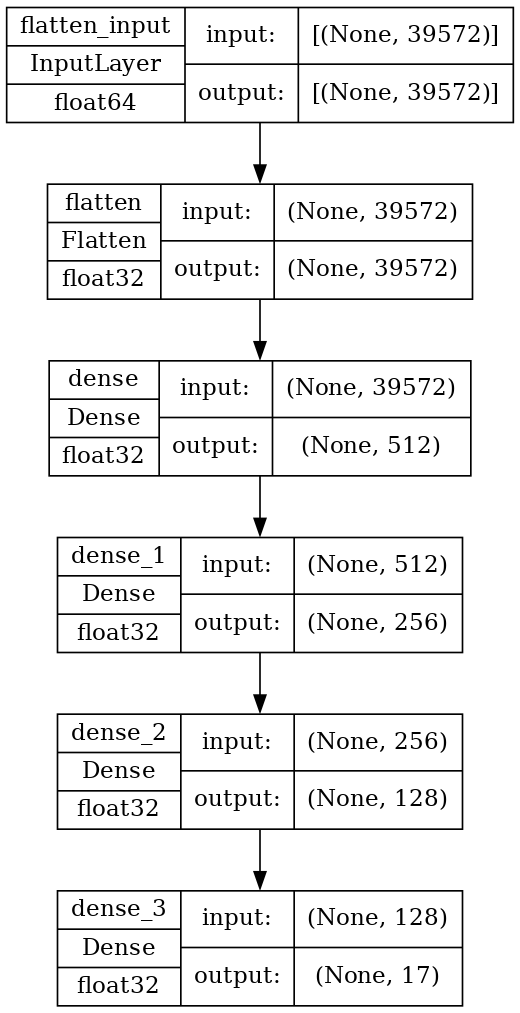

In [33]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [46]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 13ms/step - loss: 0.1111 - accuracy: 0.9720


[0.11113238334655762, 0.9719535708427429]

In [47]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy
0,0.583326,0.841341
1,0.025012,0.995055
2,0.012393,0.996453
3,0.010439,0.996883
4,0.012177,0.996668


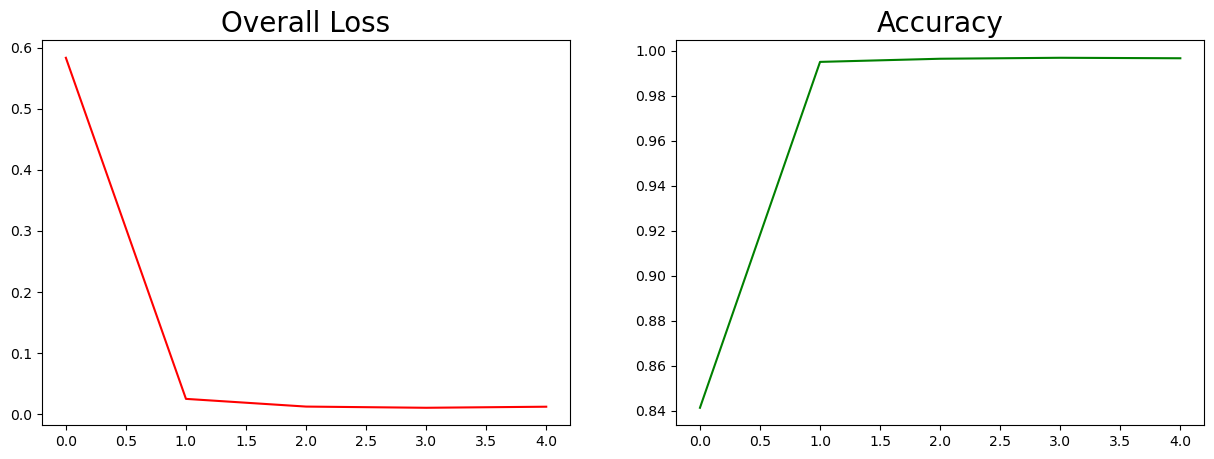

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Overall Loss',fontsize=20)
plt.plot(hist_['loss'],c='r',label='Overall Loss')
plt.subplot(1,2,2)
plt.title('Accuracy',fontsize=20)
plt.plot(hist_['accuracy'],c='g',label='Accuracy')

In [49]:
prediction=model.predict(X_test)

33/33 [==============================] - 1s 14ms/step


In [50]:
y_pred=[]
pred=[]
for row in prediction:
    N=np.argmax(row)
    y_pred.append(N)
    pred.append(get_code(N))
pd.DataFrame(pred,columns=['Predictions'])    

,Predictions
0,Turkish
1,Tamil
2,Turkish
3,Russian
4,Russian
...,...
1029,Portuguese
1030,English
1031,Tamil
1032,English


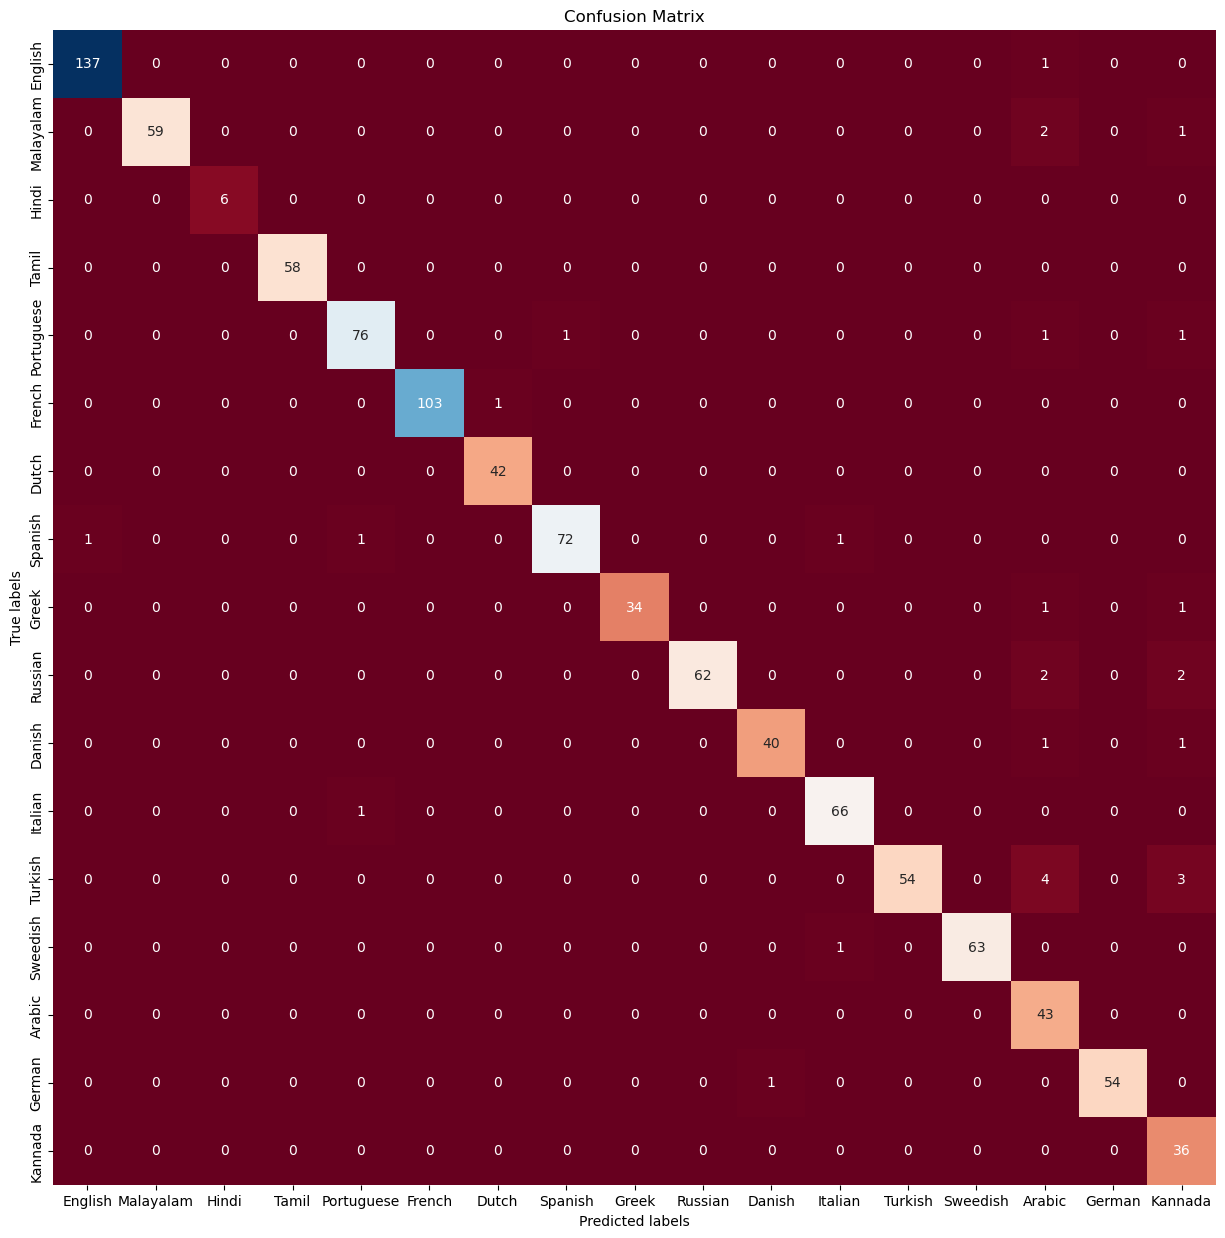

array([[137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0],
       [  0,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   1],
       [  0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  58,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  76,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   1,   0,   1],
       [  0,   0,   0,   0,   0, 103,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   0,   0,  72,   0,   0,   0,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,   0,   0,   0,   0,
          0,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  62,   0,   0,   0,
         

In [51]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(dic.keys()) 
ax.yaxis.set_ticklabels(dic.keys())
plt.show()
CM

In [52]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       1.00      0.95      0.98        62
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        58
           4       0.97      0.96      0.97        79
           5       1.00      0.99      1.00       104
           6       0.98      1.00      0.99        42
           7       0.99      0.96      0.97        75
           8       1.00      0.94      0.97        36
           9       1.00      0.94      0.97        66
          10       0.98      0.95      0.96        42
          11       0.97      0.99      0.98        67
          12       1.00      0.89      0.94        61
          13       1.00      0.98      0.99        64
          14       0.78      1.00      0.88        43
          15       1.00      0.98      0.99        55
          16       0.80      1.00      0.89        36

In [53]:
def prediction_func(sentence):
    sent=' '.join(remove_stop_word(sentence))
    sent=PipelineModel.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    return get_code(np.argmax(model.predict(sent)))

In [54]:
#Arabic
prediction_func("مرحبا كيف حالك؟")

1/1 [==============================] - 0s 31ms/step


'Arabic'

In [55]:
#English
prediction_func('hello my name ahmed!')

1/1 [==============================] - 0s 31ms/step


'English'

In [56]:
#German
prediction_func('Mehrere Wörter, die einen Satz bilden, verwirren dich wohl.')

1/1 [==============================] - 0s 31ms/step


'German'

In [57]:
#French
prediction_func('Je commence à m’énerver')

1/1 [==============================] - 0s 16ms/step


'Dutch'

In [58]:
#Dutch
prediction_func('Ik moet met je praten')

1/1 [==============================] - 0s 30ms/step


'Dutch'

# Sava Model

In [59]:
model.save('Language_model.h5')

In [60]:
savedmodel=keras.models.load_model('Language_model.h5')

# GOOD LUCK🤞🤞
Prof.Dr.𝔄𝔥𝔪𝔢𝔡 𝔄𝔰𝔥𝔯𝔞𝔣